In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *

In [2]:
import os
import pandas as pd
import numpy as np
from pathlib import Path

## Read the Dataset

In [3]:
manual_seed = 555
random.seed(manual_seed)
np.random.seed(manual_seed)
torch.manual_seed(manual_seed)
torch.cuda.manual_seed_all(manual_seed)
torch.backends.cudnn.deterministic = True

In [4]:
data = ImageDataBunch.from_folder('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species',size=224, ds_tfms=get_transforms(), bs=32)
# data.train_dl.one_batch()[0].shape

In [4]:
path = '/mnt/datadrive1/h216520/Image_Classification/Data/flowers-recognition'
data = ImageDataBunch.from_csv(path, csv_labels='allflowers.csv', folder='all_flowers',size=224, ds_tfms=get_transforms())

In [5]:
i2cmapping = {}
i2cmapping.update(zip(data.train_ds.class2idx.values(), data.train_ds.class2idx.keys()))
pd.Series([i2cmapping[i] for i in data.train_ds.y]).value_counts()/data.train_ds.y.shape[0]*100
pd.Series([i2cmapping[i] for i in data.valid_ds.y]).value_counts()/data.valid_ds.y.shape[0]*100

n3_japanese_macaque             11.121240
n7_common_squirrel_monkey       10.391978
n5_white_headed_capuchin        10.300820
n1_patas_monkey                 10.118505
n2_bald_uakari                  10.027347
n6_silvery_marmoset              9.662716
n8_black_headed_night_monkey     9.662716
n0_mantled_howler                9.571559
n4_pygmy_marmoset                9.571559
n9_nilgiri_langur                9.571559
dtype: float64

n3_japanese_macaque             11.029412
n1_patas_monkey                 10.294118
n5_white_headed_capuchin        10.294118
n7_common_squirrel_monkey       10.294118
n2_bald_uakari                   9.926471
n8_black_headed_night_monkey     9.926471
n6_silvery_marmoset              9.558824
n0_mantled_howler                9.558824
n9_nilgiri_langur                9.558824
n4_pygmy_marmoset                9.558824
dtype: float64

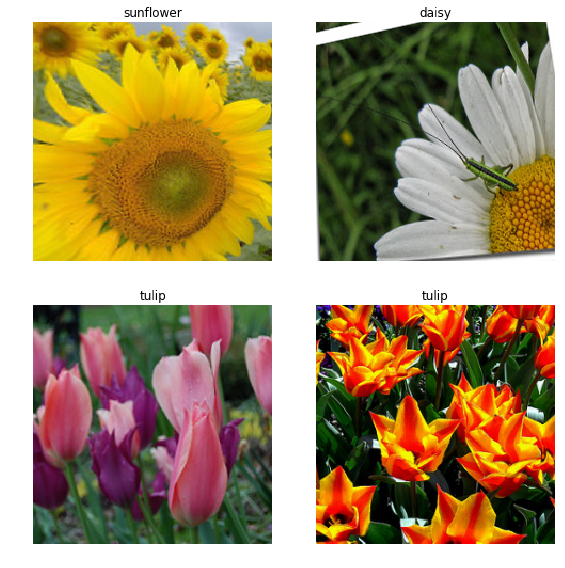

In [6]:
data.show_batch(rows=2)

In [6]:
data.train_ds.tfms

[RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={'row_pct': 0.1849083610636153, 'col_pct': 0.019350020620983344, 'padding_mode': 'reflection'}, do_run=True, is_random=True),
 RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True),
 RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={'magnitude': tensor([-0.1792,  0.1395,  0.1686,  0.1018]), 'invert': False}, do_run=True, is_random=True),
 RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={'degrees': 1.430121771672738}, do_run=True, is_random=True),
 RandTransform(tfm=TfmAffine (zoom), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'scale': (1.0, 1.1)}, p=0.75, resolved={'row_pct': 0.6166778290998184, 'col_pct': 0.8005147132462663, 'scale': 1.098007436170966}, do_run=True, is_random=True),
 RandTransform(tfm=TfmLighting (brightness), kwargs={'change': 

In [89]:
from fastai.vision import models
learner = create_cnn(data, models.resnet18, metrics=[error_rate, accuracy], lin_ftrs=[512, 256])

In [6]:
learner.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 64, 112, 112]   9408       False     
______________________________________________________________________
BatchNorm2d          [64, 64, 112, 112]   128        True      
______________________________________________________________________
ReLU                 [64, 64, 112, 112]   0          False     
______________________________________________________________________
MaxPool2d            [64, 64, 56, 56]     0          False     
______________________________________________________________________
Conv2d               [64, 64, 56, 56]     36864      False     
______________________________________________________________________
BatchNorm2d          [64, 64, 56, 56]     128        True      
______________________________________________________________________
ReLU                 [64, 64, 56, 56]     0          False     
______________________________________________________________

In [90]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [99]:
x = learner.callback_fns[0]

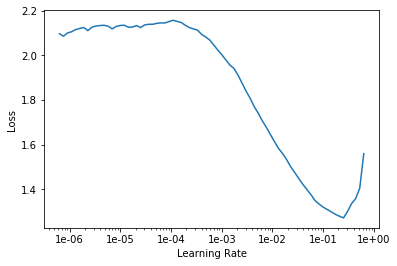

In [91]:
learner.recorder.plot()

In [7]:
learner.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.748802,0.413005,0.142526,0.857474
2,0.486150,0.377768,0.118192,0.881808
3,0.358503,0.375823,0.134415,0.865585
4,0.283979,0.293721,0.096176,0.903824
5,0.223694,0.285254,0.086906,0.913094


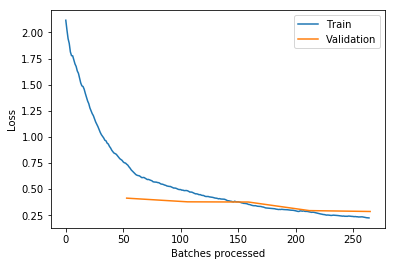

In [8]:
learner.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


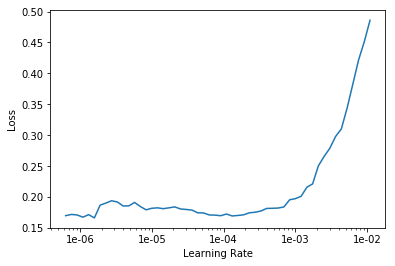

In [10]:
learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

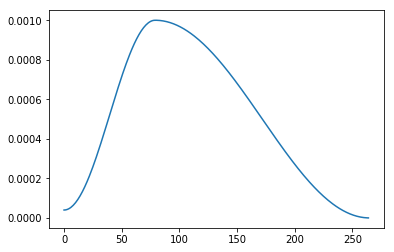

In [68]:
learner.recorder.plot_lr()

In [11]:
learner.fit_one_cycle(5, slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.189278,0.268761,0.081112,0.918888
2,0.179040,0.290855,0.096176,0.903824
3,0.139520,0.298621,0.090382,0.909618
4,0.104252,0.277466,0.081112,0.918888
5,0.083947,0.267019,0.074160,0.925840


In [13]:
learner.lr_find??

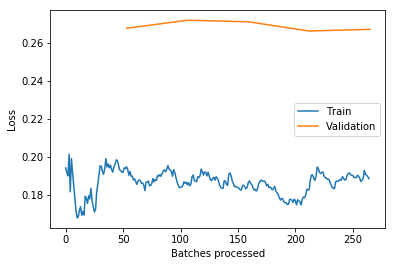

In [14]:
learner.recorder.plot_losses()

In [16]:
learner.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 64, 112, 112]   9408       True      
______________________________________________________________________
BatchNorm2d          [64, 64, 112, 112]   128        True      
______________________________________________________________________
ReLU                 [64, 64, 112, 112]   0          False     
______________________________________________________________________
MaxPool2d            [64, 64, 56, 56]     0          False     
______________________________________________________________________
Conv2d               [64, 64, 56, 56]     36864      True      
______________________________________________________________________
BatchNorm2d          [64, 64, 56, 56]     128        True      
______________________________________________________________________
ReLU                 [64, 64, 56, 56]     0          False     
______________________________________________________________

In [146]:
interp = ClassificationInterpretation.from_learner(learner)

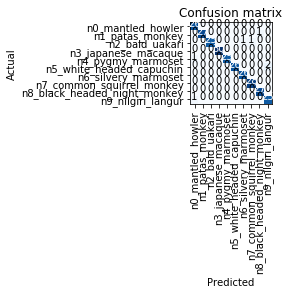

In [147]:
interp.plot_confusion_matrix()

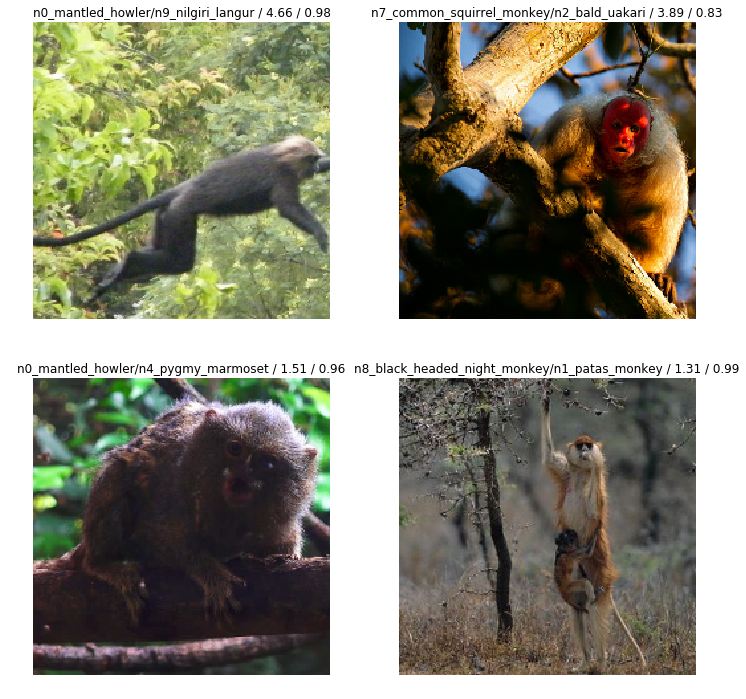

In [153]:
interp.plot_top_losses(4)

In [151]:
interp.most_confused()

[('n5_white_headed_capuchin', 'n9_nilgiri_langur', 2)]

In [156]:
doc(ClassificationInterpretation)